<a href="https://colab.research.google.com/github/Marlburo/pycaretExample/blob/main/Pycaret_exampl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.utils import enable_colab
from pycaret.datasets import get_data
enable_colab()

Colab mode enabled.


In [ ]:
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
print(dataset)

      Carat Weight              Cut Color Clarity Polish Symmetry Report  Price
0             1.10            Ideal     H     SI1     VG       EX    GIA   5169
1             0.83            Ideal     H     VS1     ID       ID   AGSL   3470
2             0.85            Ideal     H     SI1     EX       EX    GIA   3183
3             0.91            Ideal     E     SI1     VG       VG    GIA   4370
4             0.83            Ideal     G     SI1     EX       EX    GIA   3171
...            ...              ...   ...     ...    ...      ...    ...    ...
5995          1.03            Ideal     D     SI1     EX       EX    GIA   6250
5996          1.00        Very Good     D     SI1     VG       VG    GIA   5328
5997          1.02            Ideal     D     SI1     EX       EX    GIA   6157
5998          1.27  Signature-Ideal     G     VS1     EX       EX    GIA  11206
5999          2.19            Ideal     E     VS1     EX       EX    GIA  30507

[6000 rows x 8 columns]


In [ ]:
dataset.shape

(6000, 8)

In [ ]:
data = dataset.sample(frac=0.7, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4200, 8)
Unseen Data For Predictions: (1800, 8)


In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target="Price", session_id = 123)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(4200, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2939, 28)"


In [ ]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,742.5052,2.551037e+06,1565.0685,0.9743,0.0804,0.0603,1.089
rf,Random Forest Regressor,744.2527,2.988271e+06,1665.3259,0.9697,0.0820,0.0596,1.018
gbr,Gradient Boosting Regressor,899.9470,3.361589e+06,1807.5617,0.9661,0.1022,0.0768,0.213
lightgbm,Light Gradient Boosting Machine,778.8979,3.830315e+06,1893.2884,0.9615,0.0816,0.0581,0.114
dt,Decision Tree Regressor,985.3163,4.400573e+06,2058.5306,0.9552,0.1102,0.0801,0.028
lasso,Lasso Regression,2323.7513,1.309934e+07,3602.1750,0.8682,0.6459,0.2749,0.029
llar,Lasso Least Angle Regression,2274.0604,1.310562e+07,3602.3343,0.8681,0.6279,0.2629,0.019
ridge,Ridge Regression,2334.7874,1.315125e+07,3613.5708,0.8679,0.6399,0.2766,0.015
br,Bayesian Ridge,2328.9084,1.312984e+07,3607.1905,0.8679,0.6533,0.2758,0.018
lr,Linear Regression,2329.1654,1.312863e+07,3605.9386,0.8678,0.6351,0.2758,0.321


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
ada = create_model('ada')
print(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3837.3843,2.163460e+07,4651.3011,0.8133,0.4504,0.5006
1,3801.5286,1.810800e+07,4255.3499,0.8134,0.4556,0.5190
2,3653.6142,1.953283e+07,4419.5966,0.8010,0.4234,0.4677
3,3647.6680,2.070210e+07,4549.9562,0.8018,0.4165,0.4685
4,3740.0708,1.925717e+07,4388.2989,0.7754,0.4426,0.5019
5,3981.7803,2.655766e+07,5153.4121,0.7350,0.4419,0.5001
6,3992.8831,2.541301e+07,5041.1316,0.7213,0.4202,0.4582
7,3775.7341,2.072407e+07,4552.3703,0.8202,0.4456,0.5019
8,3408.0714,2.073637e+07,4553.7207,0.7764,0.4110,0.4406
9,3632.4596,2.005400e+07,4478.1688,0.7825,0.4416,0.4972


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [ ]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2527.3708,1.766573e+07,4203.0615,0.8476,0.4702,0.2687
1,2355.8435,1.179249e+07,3434.0190,0.8785,0.6655,0.2773
2,2088.8479,1.009378e+07,3177.0703,0.8972,0.6247,0.2421
3,2295.0305,1.115450e+07,3339.8347,0.8932,0.6354,0.3024
4,2143.2261,1.240112e+07,3521.5222,0.8554,0.6024,0.2532
5,2334.4490,1.177337e+07,3431.2341,0.8825,0.6440,0.2880
6,2405.0952,1.168760e+07,3418.7124,0.8718,0.5867,0.2734
7,2448.1375,1.637359e+07,4046.4287,0.8580,0.6761,0.2709
8,2438.2168,1.713318e+07,4139.2251,0.8153,0.7303,0.2825
9,2255.4365,1.121096e+07,3348.2778,0.8784,0.7155,0.2995


In [ ]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2978.3177,1.522581e+07,3902.0260,0.8686,0.3599,0.3640
1,2913.3851,1.258491e+07,3547.5224,0.8703,0.3589,0.3699
2,2756.3253,1.425011e+07,3774.9312,0.8548,0.3418,0.3385
3,3081.7699,1.851091e+07,4302.4307,0.8228,0.3831,0.3975
4,3197.0191,1.687927e+07,4108.4394,0.8032,0.3700,0.3882
5,3266.8899,2.277808e+07,4772.6388,0.7727,0.3726,0.3862
6,3463.0188,2.077299e+07,4557.7390,0.7722,0.3680,0.3792
7,3088.4938,1.784203e+07,4223.9827,0.8452,0.3766,0.3856
8,3122.7575,2.014297e+07,4488.0915,0.7828,0.3718,0.3775
9,3020.8013,1.524963e+07,3905.0775,0.8346,0.3903,0.4111


In [ ]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2531.4453,1.774731e+07,4212.7554,0.8469,0.4796,0.2691
1,2362.5132,1.182507e+07,3438.7605,0.8782,0.7031,0.2787
2,2088.8462,1.009377e+07,3177.0698,0.8972,0.6247,0.2421
3,2301.7390,1.114557e+07,3338.4983,0.8933,0.6601,0.3039
4,2143.2275,1.240112e+07,3521.5232,0.8554,0.6024,0.2532
5,2336.7815,1.178260e+07,3432.5791,0.8824,0.6322,0.2884
6,2353.5791,1.133087e+07,3366.1353,0.8758,0.6937,0.2667
7,2448.1387,1.637359e+07,4046.4287,0.8580,0.6761,0.2709
8,2438.2168,1.713318e+07,4139.2251,0.8153,0.7303,0.2825
9,2255.4365,1.121096e+07,3348.2778,0.8784,0.7155,0.2995


In [ ]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.4, loss='exponential',
                  n_estimators=80, random_state=123)


In [ ]:
print(tuned_lr)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)


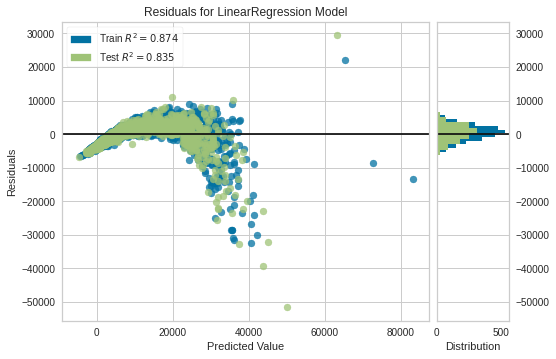

In [ ]:
plot_model(tuned_lr)

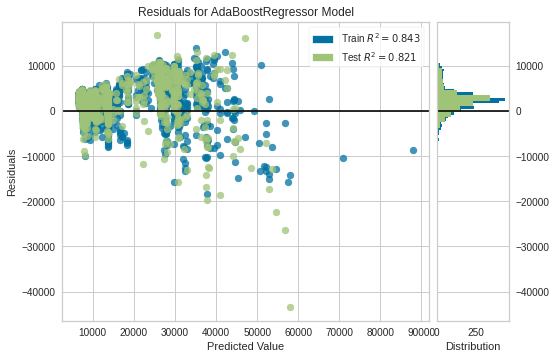

In [ ]:
plot_model(tuned_ada)

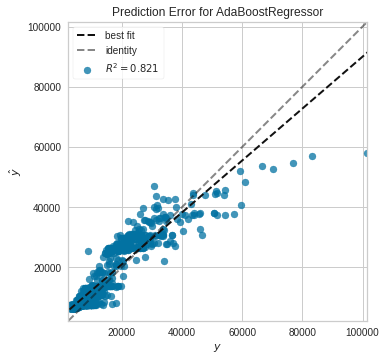

In [ ]:
plot_model(tuned_ada, plot='error')

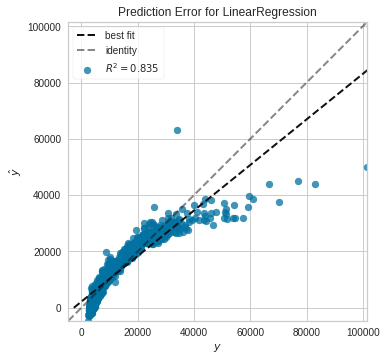

In [ ]:
plot_model(tuned_lr, plot='error')

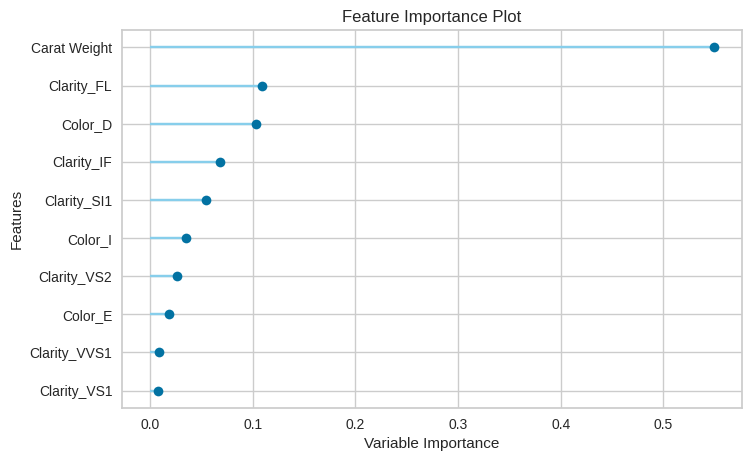

In [ ]:
plot_model(tuned_ada, plot = 'feature')

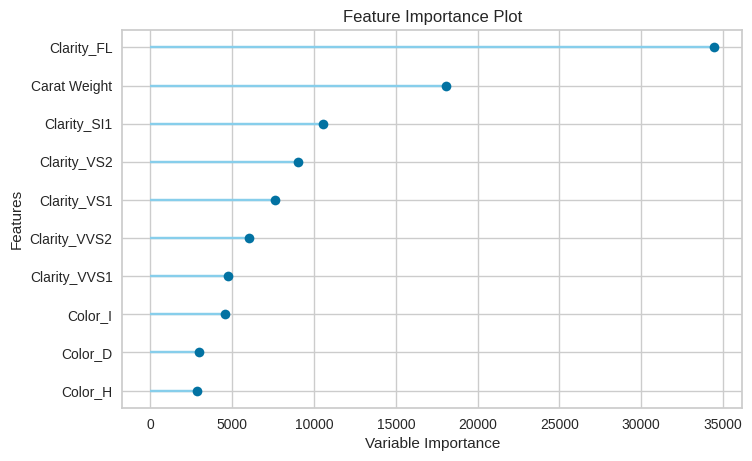

In [ ]:
plot_model(tuned_lr, plot='feature')

In [ ]:
evaluate_model(tuned_ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,2512.532471,18317046.0,4279.841797,0.8352,0.7405,0.2806


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_FL,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,2.64,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,35856.0,35002.128906
1,1.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8024.0,8160.880371
2,1.51,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,12779.0,15940.181641
3,0.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4027.0,867.980713
4,1.03,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4800.0,2052.343506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.04,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4768.0,3479.853760
1257,0.79,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3167.0,-1154.730835
1258,1.27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10750.0,14226.653320
1259,1.23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6817.0,6290.945801


In [ ]:
predict_model(tuned_ada);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,3279.9179,1.988257e+07,4458.988,0.8211,0.3739,0.3864


In [ ]:
predict_model(tuned_lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,2512.532471,18317046.0,4279.841797,0.8352,0.7405,0.2806


In [ ]:
final_ada = finalize_model(tuned_ada)

In [ ]:
final_lr = finalize_model(tuned_lr)

In [ ]:
print(final_lr)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)


In [ ]:
print(final_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.4, loss='exponential',
                  n_estimators=80, random_state=123)


In [ ]:
unseen_predictions = predict_model(final_lr, data = data_unseen) 

In [ ]:
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,1266.131226
1,0.83,Ideal,G,SI1,EX,EX,GIA,3171,659.049316
2,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,15245.626953
3,1.00,Very Good,D,SI1,VG,G,GIA,5747,7553.606445
4,1.50,Fair,F,SI1,VG,VG,GIA,10450,13790.978516
